<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Demo_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

#Support vector machine library
from sklearn import svm

import seaborn as sns

## Classify apples based on greenness and roundness

In [ ]:
# Read dataset

dataset = pd.read_csv('apples.csv')

dataset.head()

,roundness,greenness,apple
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1


In [ ]:
# Split in features and targets
# features: x1 = roundness and x2 = greenness

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values
y= dataset['apple'].values

Features (X): roundness en greenness

Targets (y): De appel klasse (0 of 1)

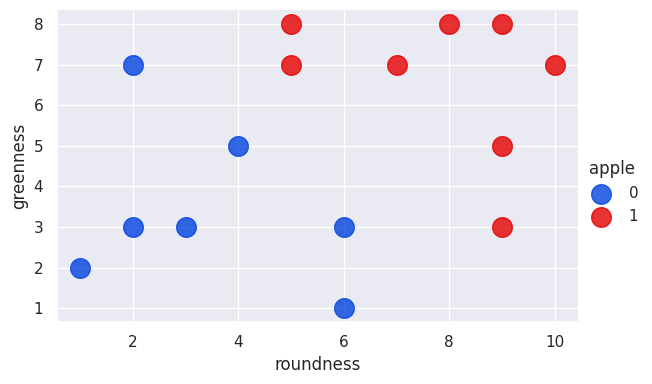

In [ ]:
# Scatterplot

sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':200}, height=4, aspect=1.5)


Wat gebeurt hier?

Plot een scatterplot van roundness versus greenness.

Kleurt de punten op basis van de apple klasse.

Doel: Bekijk of de klassen lineair scheidbaar zij

In [ ]:
SVMmodel = svm.SVC(kernel='linear',C=1000)
SVMmodel.fit(X, y)

SVC(C=1000, kernel='linear')

Kernel: linear

Regularisatie (C): 1000 (zeer zwakke regularisatie, focus op maximale scheiding)

Effect: Minder tolerant voor fouten (minder outliers geaccepteerd).

In [ ]:
# predict roundness = 8 and greenness = 6

print(SVMmodel.predict(np.array([8,6]).reshape(1,-1)))


# predict roundness = 4 and greenness = 4

print(SVMmodel.predict(np.array([4,4]).reshape(1,-1)))


[1]
[0]


Voorspellingen:

Rondheid 8, groenheid 6 -> waarschijnlijk een appel of geen appel?

Rondheid 4, groenheid 4 -> waarschijnlijk een appel of geen appel?

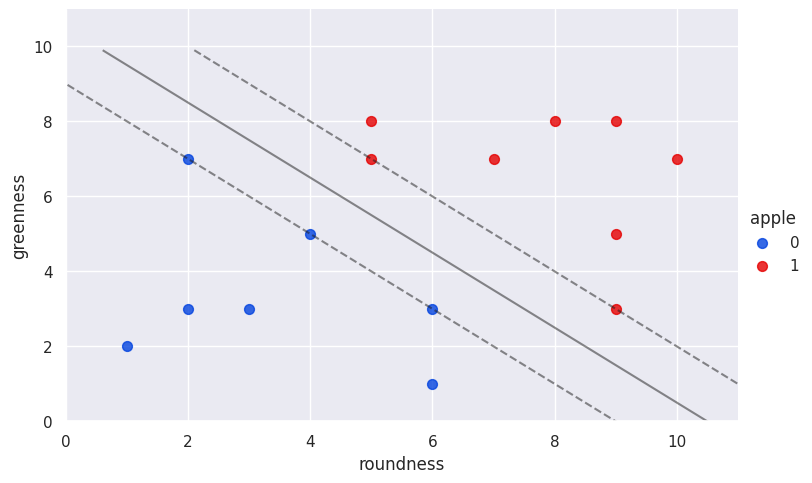

In [ ]:
h = 0.1
round_min = X[:,0].min()-2
round_max = X[:,0].max()+2
green_min = X[:,1].min()-2
green_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(round_min, round_max, h),np.arange(green_min, green_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = SVMmodel.decision_function(xy).reshape(xx.shape)


sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


Wat gebeurt hier?

Plot de originele data en voegt de beslissingsgrenzen toe.

Levels:

0: Harde beslissingsgrens (echte scheidingslijn)

-1 en 1: Marges voor de support vectors.

Wat gebeurt hier?

Maakt een grid van punten die de volledige ruimte van roundness en greenness bedekken.

Berekent de decision function voor elk van deze punten.

In [ ]:
print(SVMmodel.support_vectors_)

[[6. 3.]
 [2. 7.]
 [5. 7.]]


Support Vectors: Dit zijn de kritische samples die de beslissingsgrens beïnvloeden.

### Dataset with outlier

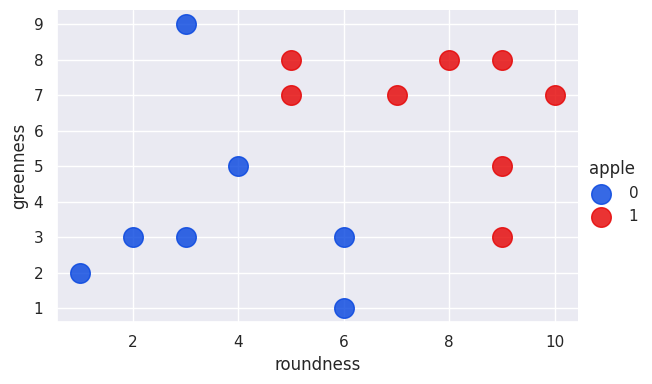

In [ ]:
dataset.loc[14:14,'roundness':'greenness']=3,9

sns.set(font_scale = 1) # lettergrootte van de axis labels
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':200}, height=4, aspect=1.5)



Wat gebeurt hier?

Voegt een outlier toe op positie (3,9) en plot de data opnieuw.

Effect: Kan de beslissingsgrens significant beïnvloeden als C laag is.

Wat gebeurt hier?

Voegt een outlier toe op positie (3,9) en plot de data opnieuw.

Effect: Kan de beslissingsgrens significant beïnvloeden als C laag is.

In [ ]:
features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values
y= dataset['apple'].values


SVMmodel = svm.SVC(kernel='linear',C=0.1)
SVMmodel.fit(X, y)

print(SVMmodel.support_vectors_)



[[6. 3.]
 [4. 5.]
 [6. 1.]
 [3. 9.]
 [5. 8.]
 [7. 7.]
 [9. 3.]
 [5. 7.]]


Verlaagde Regularisatie: C=0.1 (meer tolerant voor fouten).

Effect: De beslissingsgrens zal waarschijnlijk breder worden omdat het model nu meer fouten toestaat.

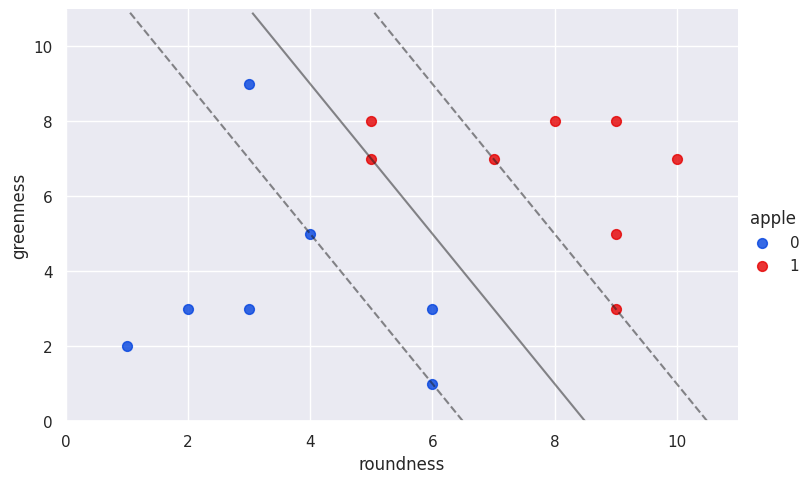

In [ ]:
# Decision boundary visualization

h = 0.1
round_min = X[:,0].min()-2
round_max = X[:,0].max()+2
green_min = X[:,1].min()-2
green_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(round_min, round_max, h),np.arange(green_min, green_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = SVMmodel.decision_function(xy).reshape(xx.shape)

sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])



### non-linear seperable classes and kernel SVM

In [ ]:
dataset =pd.read_csv('apples_non_linear.csv')
dataset.head()

,roundness,greenness,apple
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1


In [ ]:
# Split into features and targets

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values
y= dataset['apple'].values

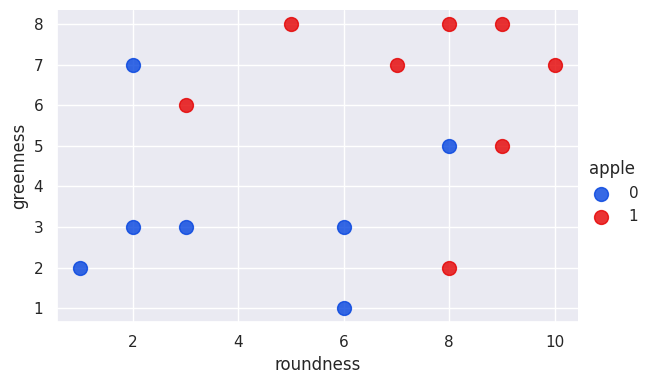

In [ ]:
# Scatterplot

sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':100}, height=4, aspect=1.5)
#sns.plt.ylim(0, 11)
#sns.plt.xlim(0, 11)

In [ ]:
SVMmodel = svm.SVC(kernel='linear',C=0.1) # linear kernel means: NO kernel
SVMmodel.fit(X, y)

print(SVMmodel.support_vectors_)

[[6. 3.]
 [8. 5.]
 [6. 1.]
 [2. 7.]
 [5. 8.]
 [9. 5.]
 [8. 2.]
 [3. 6.]]


 Lineaire Kernel: Probeert een lineaire scheiding te vinden, zelfs als de data niet-lineair scheidbaar is.

Resultaat: Zal waarschijnlijk slecht presteren op deze data.

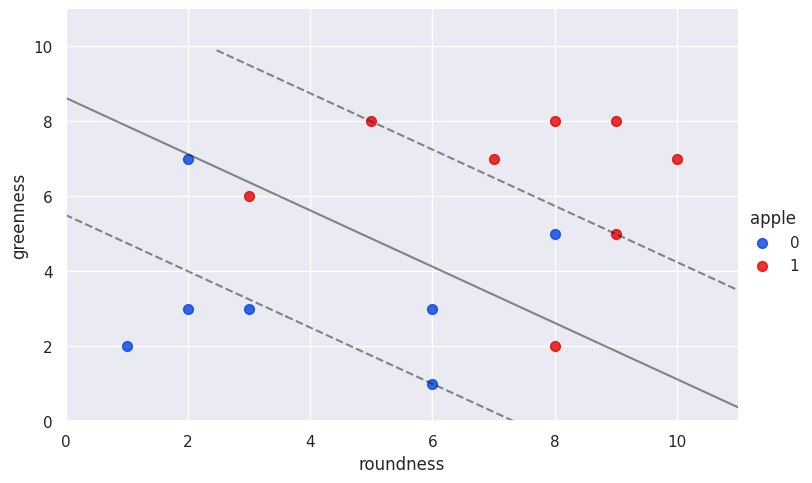

In [ ]:
# Decision boundary visualization

h = 0.1
round_min = X[:,0].min()-2
round_max = X[:,0].max()+2
green_min = X[:,1].min()-2
green_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(round_min, round_max, h),np.arange(green_min, green_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = SVMmodel.decision_function(xy).reshape(xx.shape)


sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


In [ ]:
# SVM with polynomial kernel

SVMmodel = svm.SVC(kernel='poly',degree=4,C=10000000)
SVMmodel.fit(X, y)
print(SVMmodel.support_vectors_)

[[8. 5.]
 [6. 1.]
 [2. 7.]
 [9. 5.]
 [3. 6.]]


Polynomiale Kernel: Transformeert de data naar een hogere dimensie voor betere scheiding.

Effect: Kan complexere scheidingsvlakken modelleren.



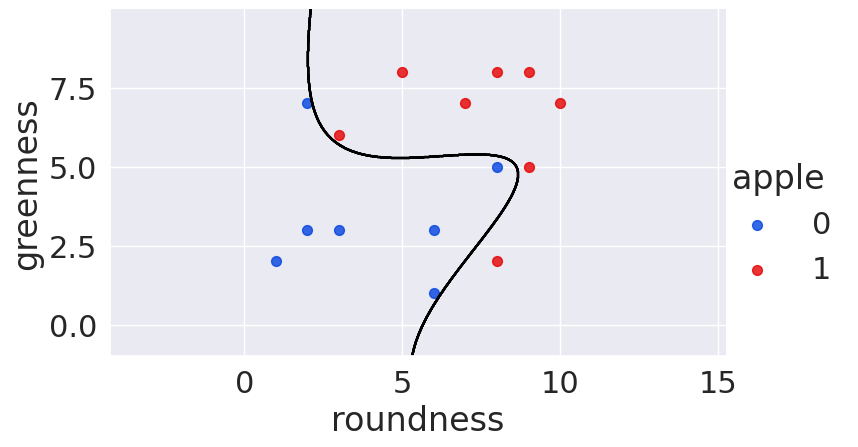

In [ ]:
# Decision boundary visualization

h = 0.01
round_min = X[:,0].min()-2
round_max = X[:,0].max()+2
green_min = X[:,1].min()-2
green_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(round_min, round_max, h),np.arange(green_min, green_max, h))
Z = SVMmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.axis('equal')
plt.contour(xx, yy, Z, colors='black')

In [ ]:
# SVM with RBF kernel

SVMmodel = svm.SVC(kernel='rbf',C=1, gamma=10)
SVMmodel.fit(X, y)

SVC(C=1, gamma=10)

RBF Kernel: Zeer flexibel, kan non-lineaire grenzen aan.

Effect: Beste keuze voor complexe beslissingsgrenzen.

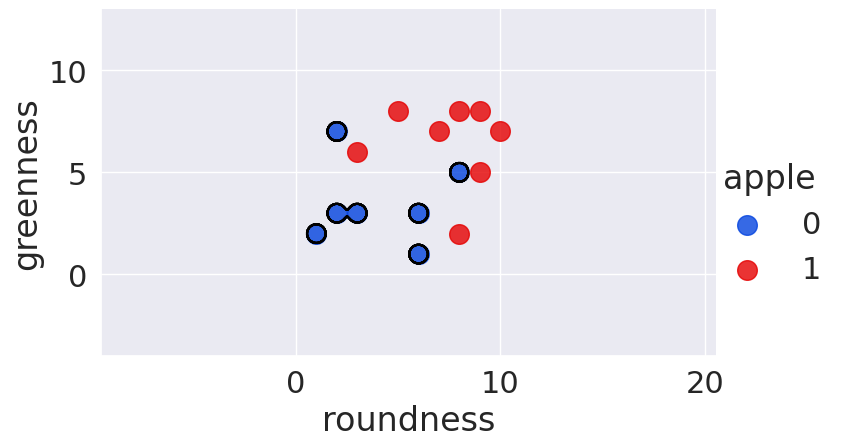

In [ ]:
# Decision boundary visualization

h = 0.01
round_min = X[:,0].min()-5
round_max = X[:,0].max()+5
green_min = X[:,1].min()-5
green_max = X[:,1].max()+5
xx, yy = np.meshgrid(np.arange(round_min, round_max, h),np.arange(green_min, green_max, h))
Z = SVMmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':200}, height=5, aspect=1.5)
plt.ylim(-4, 11)
plt.xlim(-4, 11)
plt.axis('equal')
plt.contour(xx, yy, Z, colors='black')

### **Visualisatie van de Beslissingsgrens voor een SVM Model**

Deze code maakt een **2D-beslissingsgrens** voor je getrainde **SVM** model, inclusief de verdeling van de **appels** op basis van **roundness** en **greenness**. Dit is een belangrijke stap om te begrijpen hoe je SVM **samples** classificeert.

---

#### **1. Voorbereiden van de Beslissingsgrid (Meshgrid)**

```python
h = 0.01
round_min = X[:,0].min()-5
round_max = X[:,0].max()+5
green_min = X[:,1].min()-5
green_max = X[:,1].max()+5
xx, yy = np.meshgrid(np.arange(round_min, round_max, h),np.arange(green_min, green_max, h))
```

* **Wat gebeurt hier?**

  * Je creëert een **grid** van punten over de volledige ruimte van **roundness** en **greenness**.
* **Details:**

  * **`h = 0.01`**: Stapgrootte van het grid (hoger = grovere resolutie).
  * **`round_min` en `round_max`**: Bepalen de horizontale grenzen van het grid.
  * **`green_min` en `green_max`**: Bepalen de verticale grenzen van het grid.
* **Waarom belangrijk?**

  * Dit grid wordt gebruikt om de beslissingsgrens van je SVM te tekenen.

---

#### **2. Berekenen van de Beslissingsgrens (Prediction)**

```python
Z = SVMmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
```

* **Wat gebeurt hier?**

  * **Flatten:** Combineer de `xx` en `yy` meshgrids in één **lange lijst** met coordinaten.
  * **Predict:** Gebruik je getrainde SVM model om elke coördinaat een klasse (`0` of `1`) toe te wijzen.
  * **Reshape:** Vorm de voorspellingen terug naar de oorspronkelijke **grid** vorm voor **contour** plotten.

---

#### **3. Plotten van de Data (Scatterplot)**

```python
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette=sns.xkcd_palette(colors),scatter_kws={'s':200}, height=5, aspect=1.5)
```

* **Wat gebeurt hier?**

  * **Scatterplot** van de originele dataset met **kleur** voor elke klasse (`0` of `1`).
* **Waarom belangrijk?**

  * Laat je zien hoe de appels zijn verdeeld in de ruimte van **roundness** en **greenness**.

---

#### **4. Instellen van de Plotlimieten**

```python
plt.ylim(-4, 11)
plt.xlim(-4, 11)
plt.axis('equal')
```

* **Wat gebeurt hier?**

  * **xlim** en **ylim** stellen de grenzen van de plot in.
  * **`plt.axis('equal')`** zorgt ervoor dat de **x**- en **y**-assen dezelfde schaal hebben.
* **Waarom belangrijk?**

  * Voorkomt vervorming van de beslissingsgrens, wat de interpretatie kan bemoeilijken.

---

#### **5. Plotten van de Beslissingsgrens (Contour)**

```python
plt.contour(xx, yy, Z, colors='black')
```

* **Wat gebeurt hier?**

  * Plot de **beslissingsgrens** (waar de klasse verandert) over je scatterplot.
* **Effect:**

  * De **zwarte lijnen** tonen waar je model de **klasse** verandert van **0** naar **1**.
* **Waarom belangrijk?**

  * Helpt je te begrijpen hoe je model samples scheidt.

---

#### **6. Resultaat en Interpretatie**

* **Resultaat:**

  * Je ziet een **beslissingsgrens** die je appels scheidt op basis van **roundness** en **greenness**.
* **Interpretatie:**

  * **Strakke lijn:** Geeft aan dat je model **zeker** is over de scheiding.
  * **Kromme lijn:** Komt vaak voor bij **niet-lineaire** modellen zoals RBF of polynomiale kernels.

---

#### **7. Verbeteringen voor Complexere Grenzen**

* **Hogere Resolutie:** Verlaag `h` naar **0.005** voor **gladdere** contouren.
* **Feature Engineering:** Voeg nieuwe kenmerken toe zoals **kleur** of **textuur**.
* **Hyperparameter Tuning:** Pas **`C`**, **`gamma`** of **`degree`** aan voor fijnere controle over de beslissingsgrens.

---

Zal ik je laten zien hoe je de **foutmarge** (margin) van je SVM kunt visualiseren en interpreteren? 😊
